# Data Analys of DataSet Global Trust Rate

El Wellcome Global Monitor es el estudio más grande del mundo sobre cómo piensan y sienten las personas de todo el mundo sobre la ciencia y los principales desafíos de salud. Encuesta a más de 140 000 personas de más de 140 países.

A los encuestados se les preguntó: "¿En qué medida confía en cada uno de los siguientes: otras personas en su vecindario; su gobierno nacional; científicos; periodistas; médicos y enfermeras; personas que trabajan en organizaciones no gubernamentales o sin fines de lucro; curanderos? ¿Confías mucho en ellos, en algunos, en poco o en absoluto?"

Indicadores

- Confianza en el vecindario
- Confianza en el gobierno nacional en TCountry
- Confianza en los científicos de este país
- Confianza en los periodistas de este país
- Confianza en médicos y enfermeras en este país
- Confía en las personas que trabajan en organizaciones benéficas u ONG en este país
- Confía en los sanadores tradicionales de este país

Etiquetas de valor

1: Mucho
2: Algunos
3: No mucho
4: Ninguno en absoluto
99: Se negó a responder / NULL

**Global_trust-rate:** %rate de encuestados que responden "Mucho" o "Algunos" para cada país

Nota: Valores NULL excluidos


In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_datasets = '/Users/fredericksalazar/Documents/datasets/'

## Load and prep data

In [106]:
#load of dataset

df_data = pd.read_csv(path_datasets+'global_trust_rate/global_trust-rate.csv',
                      sep=',')

df_data.head(10)

,Country,Neighbourhood,Government,Scientist,Journalist,Doctor and Nurses,Philantropist,Traditional Healers
0,Albania,50.72,43.57,49.19,53.49,69.03,54.68,42.43
1,Algeria,67.30,64.98,84.42,44.31,81.13,68.35,74.09
2,Argentina,75.87,43.52,89.37,52.81,92.46,71.40,13.94
3,Australia,92.21,74.49,93.85,71.31,98.09,87.26,57.33
4,Austria,88.44,73.87,95.68,75.35,96.99,82.12,61.15
5,Bahrain,64.29,NaN,71.10,51.47,82.39,70.51,60.27
6,Bangladesh,86.78,88.39,87.31,71.72,88.87,75.47,14.65
7,Belgium,90.28,59.38,98.09,77.72,98.70,80.73,60.02
8,Benin,22.99,61.12,43.36,41.64,59.29,42.43,33.44
9,Bolivia,57.68,42.00,58.67,48.27,67.71,53.40,34.62


In [107]:
#IDentify a null data in columns

df_data.isna().sum()

Country                0
Neighbourhood          0
Government             6
Scientist              0
Journalist             1
Doctor and Nurses      0
Philantropist          0
Traditional Healers    0
dtype: int64

In [108]:
df_data = df_data.fillna(0)

In [109]:
df_data.isna().sum()

Country                0
Neighbourhood          0
Government             0
Scientist              0
Journalist             0
Doctor and Nurses      0
Philantropist          0
Traditional Healers    0
dtype: int64

## Describe Data

In [110]:
df_data.describe()

,Neighbourhood,Government,Scientist,Journalist,Doctor and Nurses,Philantropist,Traditional Healers
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,73.631858,53.910177,79.630265,59.036637,84.656726,69.596726,44.980354
std,15.491183,22.959663,15.238822,15.550896,11.954537,13.473598,19.930467
min,22.990000,0.000000,38.970000,0.000000,45.990000,29.040000,8.540000
25%,65.150000,41.050000,68.420000,49.540000,78.890000,61.010000,30.340000
50%,76.030000,53.490000,84.420000,60.170000,87.080000,70.510000,44.470000
75%,86.370000,70.380000,91.780000,68.000000,94.310000,79.690000,59.280000
max,96.130000,97.450000,98.170000,90.830000,99.400000,94.020000,92.470000


In [111]:
#set de column names to spanish

column_names = ['pais',
                'vecindario',
                'gobierno',
                'cientificos',
                'periodistas',
                'doctores_enfermeras',
                'filantropos',
                'curanderos']

df_data.columns = column_names

df_data.head()

,pais,vecindario,gobierno,cientificos,periodistas,doctores_enfermeras,filantropos,curanderos
0,Albania,50.72,43.57,49.19,53.49,69.03,54.68,42.43
1,Algeria,67.30,64.98,84.42,44.31,81.13,68.35,74.09
2,Argentina,75.87,43.52,89.37,52.81,92.46,71.40,13.94
3,Australia,92.21,74.49,93.85,71.31,98.09,87.26,57.33
4,Austria,88.44,73.87,95.68,75.35,96.99,82.12,61.15


In [112]:
#identify countries trust their governments more

df_countries_gov = df_data[['pais', 'gobierno']].sort_values('gobierno', ascending=False)

In [113]:
df_countries_gov.head(10)

,pais,gobierno
108,Uzbekistan,97.45
77,Norway,96.27
56,Laos,94.93
69,Myanmar,94.40
95,Switzerland,93.89
98,Tanzania,93.69
14,Cambodia,92.70
6,Bangladesh,88.39
73,New Zealand,86.58
25,Denmark,84.56


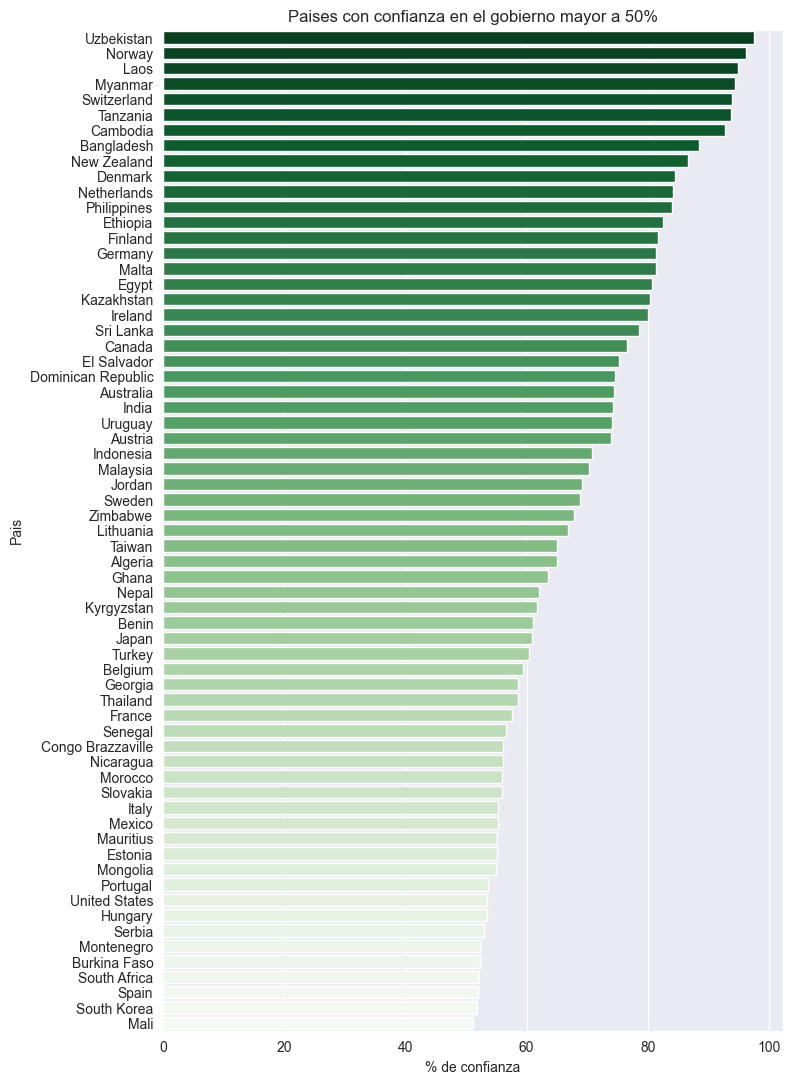

In [204]:

plt.figure(figsize=(8,13))

sns.set_style('darkgrid')

sns.barplot(data=df_countries_gov[df_countries_gov['gobierno'] > 50],
            x='gobierno',
            y='pais',
            palette='Greens_r')

plt.title('Paises con confianza en el gobierno mayor a 50%')
plt.xlabel('% de confianza')
plt.ylabel('Pais')
plt.show()

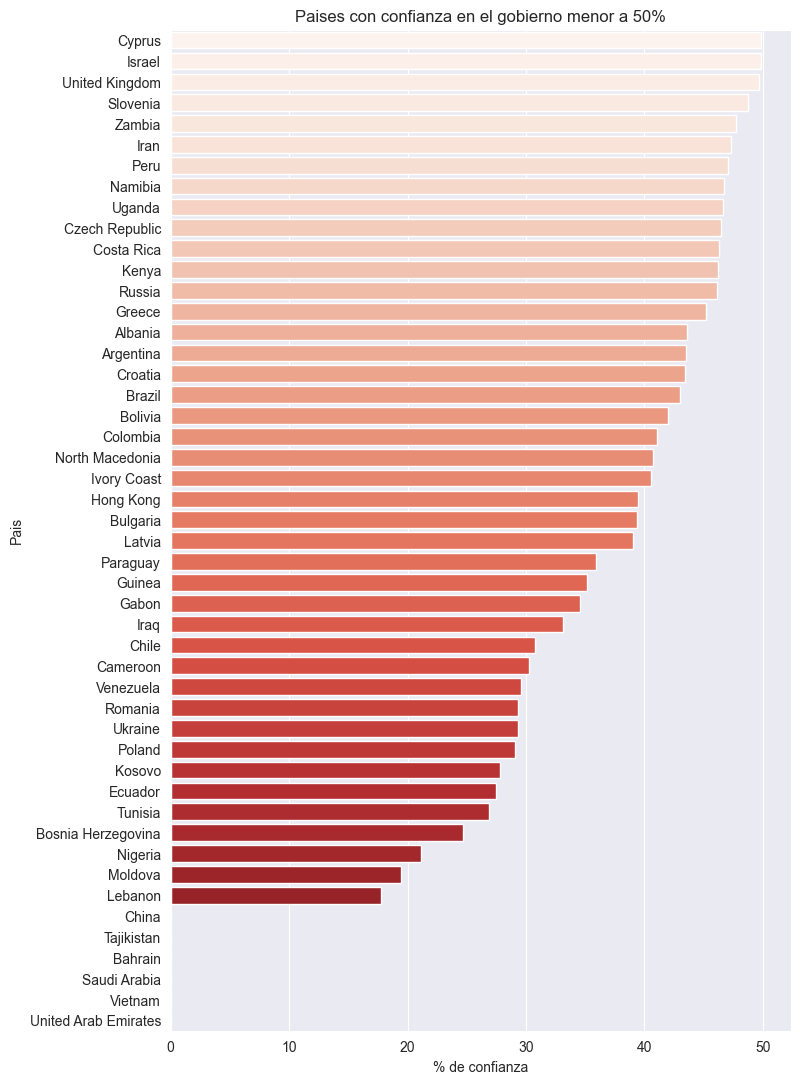

In [207]:

plt.figure(figsize=(8,13))

sns.set_style('darkgrid')

sns.barplot(data=df_countries_gov[df_countries_gov['gobierno'] < 50],
            x='gobierno',
            y='pais',
            palette='Reds')

plt.title('Paises con confianza en el gobierno menor a 50%')
plt.xlabel('% de confianza')
plt.ylabel('Pais')
plt.show()

In [116]:
df_data

,pais,vecindario,gobierno,cientificos,periodistas,doctores_enfermeras,filantropos,curanderos
0,Albania,50.72,43.57,49.19,53.49,69.03,54.68,42.43
1,Algeria,67.30,64.98,84.42,44.31,81.13,68.35,74.09
2,Argentina,75.87,43.52,89.37,52.81,92.46,71.40,13.94
3,Australia,92.21,74.49,93.85,71.31,98.09,87.26,57.33
4,Austria,88.44,73.87,95.68,75.35,96.99,82.12,61.15
...,...,...,...,...,...,...,...,...
108,Uzbekistan,90.51,97.45,93.34,90.36,93.48,83.08,45.52
109,Venezuela,61.17,29.60,66.70,53.85,77.46,59.52,27.05
110,Vietnam,77.74,0.00,76.91,60.07,88.43,79.31,79.53
111,Zambia,45.30,47.73,51.23,59.81,72.71,62.07,14.17


In [117]:
#reshape of dataframe to long format

df_pivot = pd.melt(df_data,
                   id_vars='pais',
                   value_vars=['vecindario',
                               'gobierno',
                               'cientificos',
                               'periodistas',
                               'doctores_enfermeras',
                               'filantropos',
                               'curanderos'],
                   var_name='indicador',
                   value_name='%_aceptacion').sort_values(['pais', 'indicador'], ascending=True)

In [142]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 226 to 112
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pais          791 non-null    object 
 1   indicador     791 non-null    object 
 2   %_aceptacion  791 non-null    float64
dtypes: float64(1), object(2)
memory usage: 24.7+ KB


In [118]:
df_pivot.head(20)

,pais,indicador,%_aceptacion
226,Albania,cientificos,49.19
678,Albania,curanderos,42.43
452,Albania,doctores_enfermeras,69.03
565,Albania,filantropos,54.68
113,Albania,gobierno,43.57
339,Albania,periodistas,53.49
0,Albania,vecindario,50.72
227,Algeria,cientificos,84.42
679,Algeria,curanderos,74.09
453,Algeria,doctores_enfermeras,81.13


In [119]:
df_resume_kpi = df_pivot.groupby('indicador')[['%_aceptacion']].mean().reset_index()

In [120]:
df_resume_kpi

,indicador,%_aceptacion
0,cientificos,79.630265
1,curanderos,44.980354
2,doctores_enfermeras,84.656726
3,filantropos,69.596726
4,gobierno,53.910177
5,periodistas,59.036637
6,vecindario,73.631858


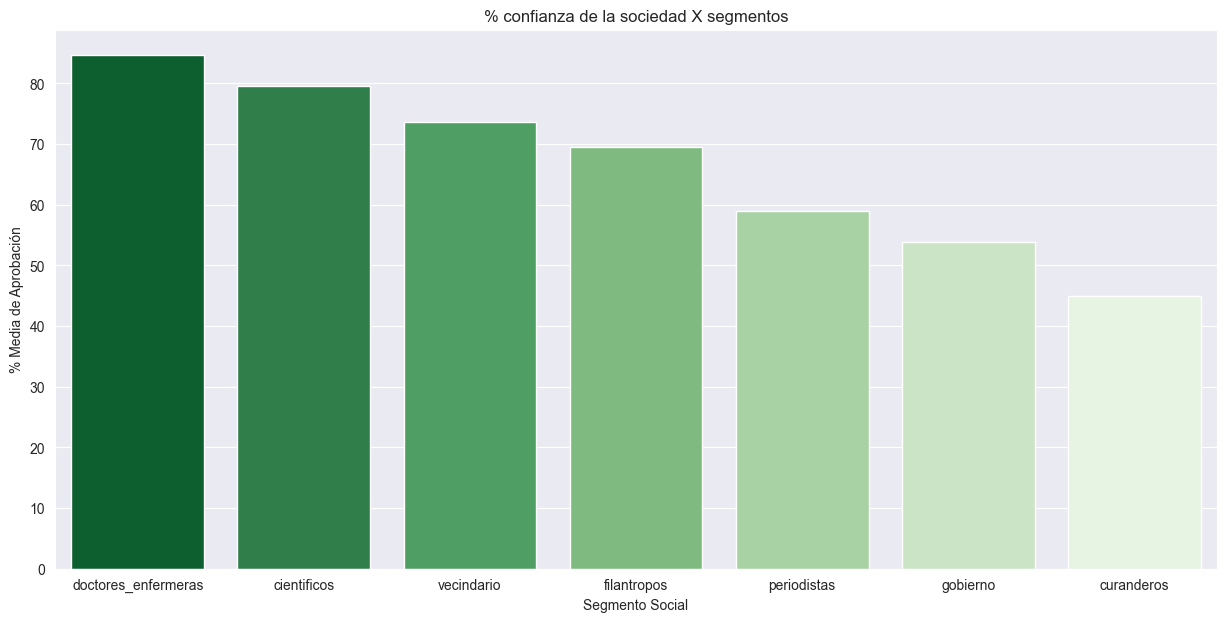

In [138]:
plt.figure(figsize=(15,7))

sns.set_style('darkgrid')

sns.barplot(data=df_resume_kpi.sort_values('%_aceptacion', ascending=False),
            x='indicador',
            y='%_aceptacion',
            palette='Greens_r')

plt.title('% confianza de la sociedad X segmentos')
plt.xlabel('Segmento Social')
plt.ylabel('% Media de Aprobación')

plt.show()

In [143]:
df_data

,pais,vecindario,gobierno,cientificos,periodistas,doctores_enfermeras,filantropos,curanderos
0,Albania,50.72,43.57,49.19,53.49,69.03,54.68,42.43
1,Algeria,67.30,64.98,84.42,44.31,81.13,68.35,74.09
2,Argentina,75.87,43.52,89.37,52.81,92.46,71.40,13.94
3,Australia,92.21,74.49,93.85,71.31,98.09,87.26,57.33
4,Austria,88.44,73.87,95.68,75.35,96.99,82.12,61.15
...,...,...,...,...,...,...,...,...
108,Uzbekistan,90.51,97.45,93.34,90.36,93.48,83.08,45.52
109,Venezuela,61.17,29.60,66.70,53.85,77.46,59.52,27.05
110,Vietnam,77.74,0.00,76.91,60.07,88.43,79.31,79.53
111,Zambia,45.30,47.73,51.23,59.81,72.71,62.07,14.17


Text(0, 0.5, 'Confianza en los gobierno')

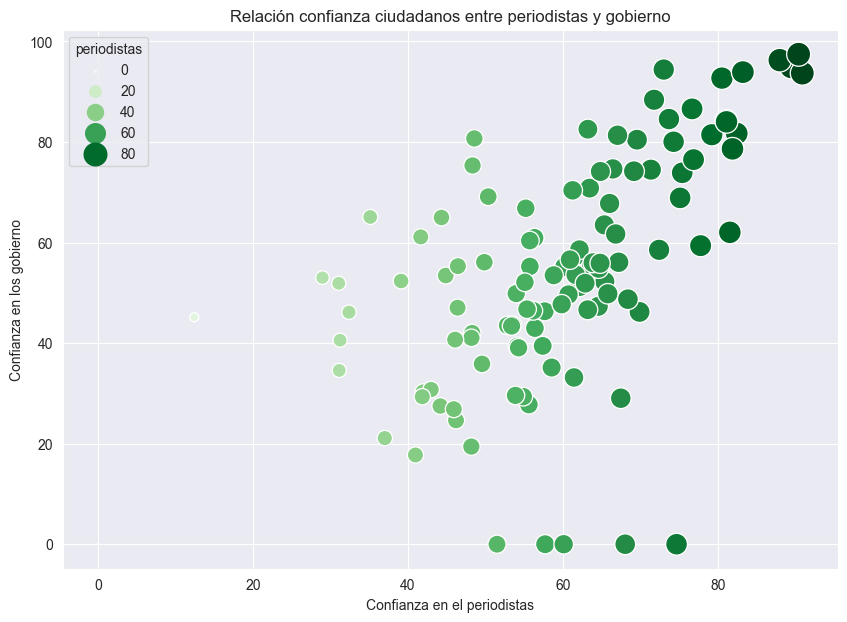

In [176]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_data,
                x=df_data['periodistas'],
                y=df_data['gobierno'],
                size=df_data['periodistas'],
                sizes=(1,300),
                hue='periodistas',
                palette='Greens')

plt.title('Relación confianza ciudadanos entre periodistas y gobierno')
plt.xlabel('Confianza en el periodistas')
plt.ylabel('Confianza en los gobierno')

Text(0, 0.5, 'Confianza en los Curanderos')

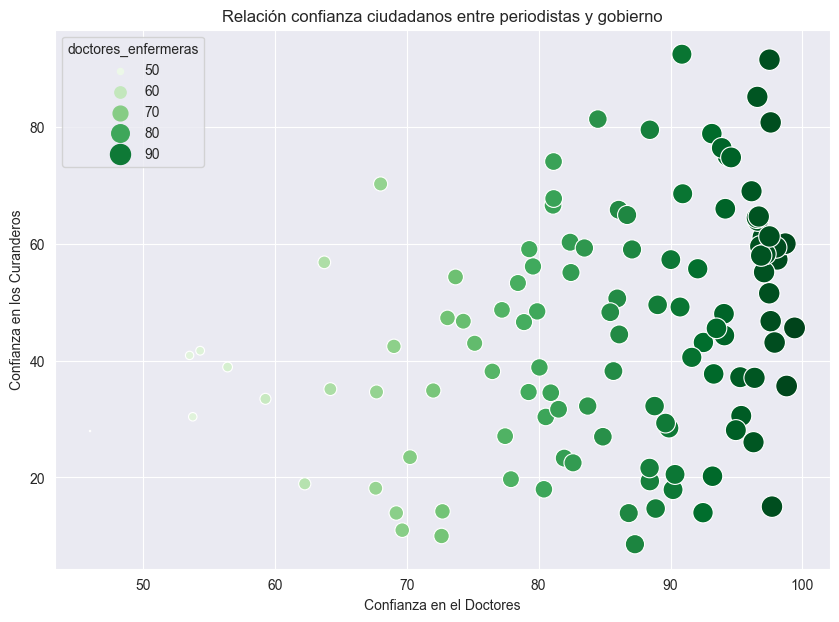

In [175]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_data,
                x=df_data['doctores_enfermeras'],
                y=df_data['curanderos'],
                size=df_data['doctores_enfermeras'],
                sizes=(1,250),
                hue='doctores_enfermeras',
                palette='Greens')

plt.title('Relación confianza ciudadanos entre periodistas y gobierno')
plt.xlabel('Confianza en el Doctores')
plt.ylabel('Confianza en los Curanderos')

# Analisis para Colombia

In [178]:
df_data_col = df_pivot[df_pivot['pais'] == 'Colombia']
df_data_col

,pais,indicador,%_aceptacion
245,Colombia,cientificos,75.03
697,Colombia,curanderos,23.29
471,Colombia,doctores_enfermeras,81.94
584,Colombia,filantropos,54.61
132,Colombia,gobierno,41.05
358,Colombia,periodistas,48.17
19,Colombia,vecindario,61.87


<AxesSubplot: xlabel='indicador', ylabel='%_aceptacion'>

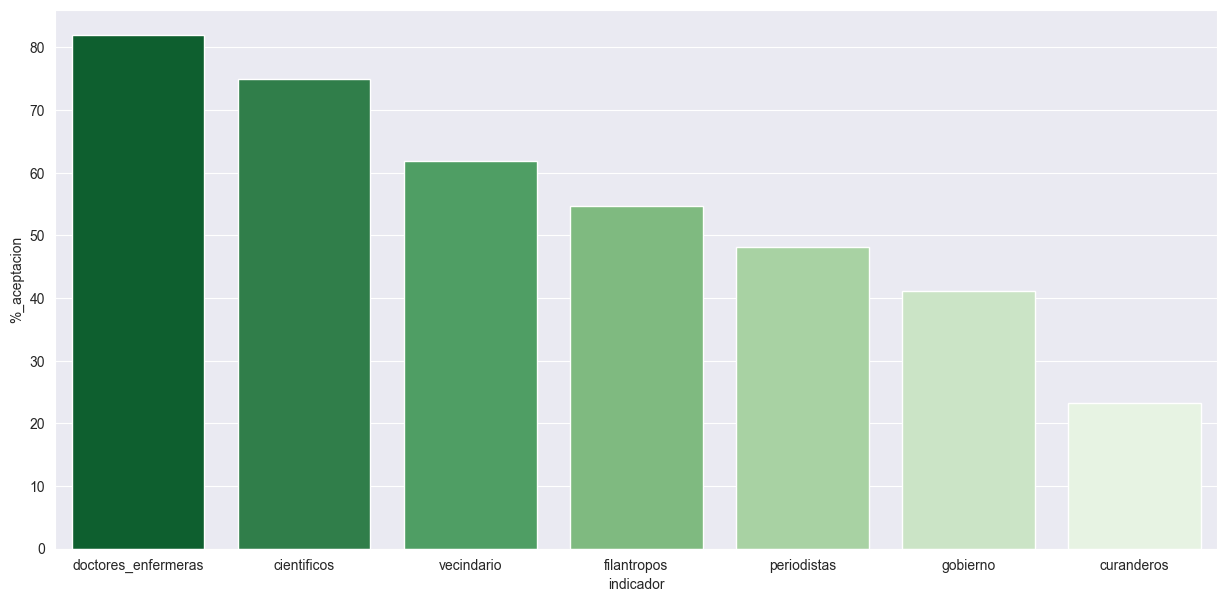

In [184]:
plt.figure(figsize=(15,7))
sns.barplot(data=df_data_col.sort_values('%_aceptacion', ascending=False),
            x='indicador',
            y='%_aceptacion',
            palette='Greens_r')


In [195]:
df_data_col[df_data_col['indicador'].isin(['gobierno', 'periodistas'])]

,pais,indicador,%_aceptacion
132,Colombia,gobierno,41.05
358,Colombia,periodistas,48.17


In [201]:
df_data_col.loc[df_data_col['indicador']=='gobierno', ['indicador', '%_aceptacion']]
df_data_col.loc[df_data_col['indicador']=='periodistas', ['indicador', '%_aceptacion']]

,indicador,%_aceptacion
358,periodistas,48.17


In [261]:
sur_america = ['Colombia',
               'Venezuela',
               'Ecuador',
               'Brazil',
               'Peru',
               'Argentina',
               'Chile',
               'Uruguay',
               'Paraguay',
               'Bolivia']

Text(0, 0.5, '% Confianza en los periodistas')

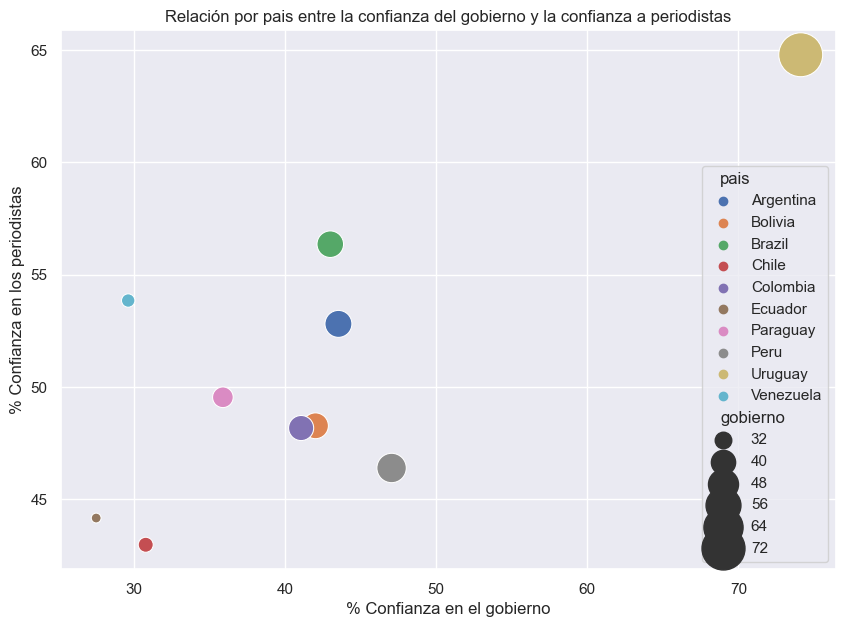

In [278]:

plt.figure(figsize=(10,7))
sns.scatterplot(data=df_data[df_data['pais'].isin(sur_america)],
                x='gobierno',
                y='periodistas',
                size='gobierno',
                hue='pais',
                sizes=(50, 1000))

plt.title('Relación por pais entre la confianza del gobierno y la confianza a periodistas')
plt.xlabel('% Confianza en el gobierno')
plt.ylabel('% Confianza en los periodistas')

In [279]:
df_data

,pais,vecindario,gobierno,cientificos,periodistas,doctores_enfermeras,filantropos,curanderos
0,Albania,50.72,43.57,49.19,53.49,69.03,54.68,42.43
1,Algeria,67.30,64.98,84.42,44.31,81.13,68.35,74.09
2,Argentina,75.87,43.52,89.37,52.81,92.46,71.40,13.94
3,Australia,92.21,74.49,93.85,71.31,98.09,87.26,57.33
4,Austria,88.44,73.87,95.68,75.35,96.99,82.12,61.15
...,...,...,...,...,...,...,...,...
108,Uzbekistan,90.51,97.45,93.34,90.36,93.48,83.08,45.52
109,Venezuela,61.17,29.60,66.70,53.85,77.46,59.52,27.05
110,Vietnam,77.74,0.00,76.91,60.07,88.43,79.31,79.53
111,Zambia,45.30,47.73,51.23,59.81,72.71,62.07,14.17


Text(0, 0.5, '% Confianza en el gobierno')

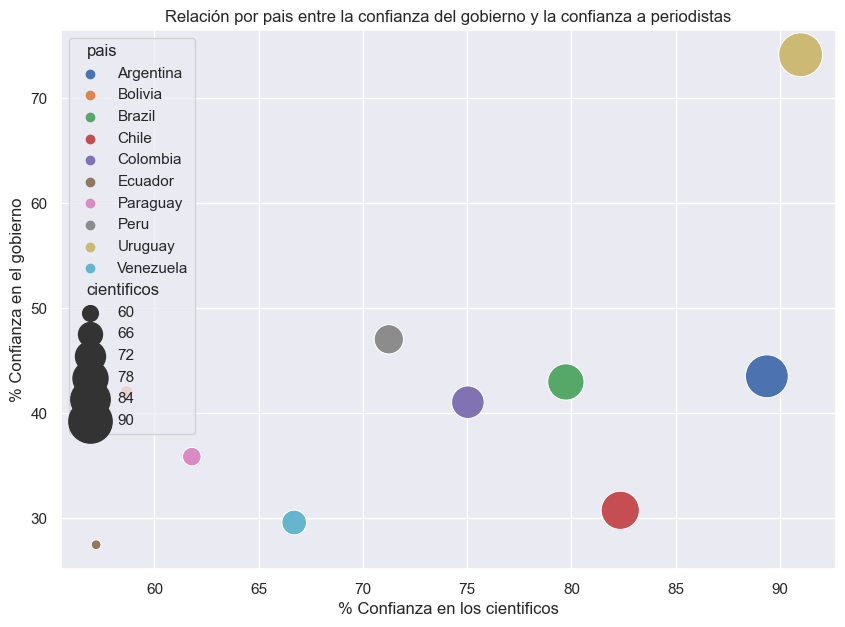

In [282]:

plt.figure(figsize=(10,7))
sns.scatterplot(data=df_data[df_data['pais'].isin(sur_america)],
                x='cientificos',
                y='gobierno',
                size='cientificos',
                hue='pais',
                sizes=(50, 1000))

plt.title('Relación por pais entre la confianza del gobierno y la confianza a periodistas')
plt.xlabel('% Confianza en los cientificos')
plt.ylabel('% Confianza en el gobierno')